### Imports

In [1]:
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import warnings
from datetime import date
warnings.filterwarnings('ignore')

### Format today {}

In [2]:
today = date.today()
print(today)

2022-12-02


### Extract raw data

In [3]:
query = f"""(("Ukrainian" OR "war" OR "russia")
from:visegrad24 OR 
from:ukraine_world OR 
from:UATV_en OR 
from:MFA_Ukraine OR 
from:DefenceU OR 
from:KpsZSU OR 
from:NATO OR 
from:dpa_intl) 
lang:en 
until:{today} 
since:2022-02-24)"""

tweets = []
limit = 20000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.user.username, tweet.date, 
                       tweet.content, tweet.source])
        
df = pd.DataFrame(tweets, columns=['Users', 'Date', 'Tweets', 'Source'])

In [4]:
df.head()

,Users,Date,Tweets,Source
0,visegrad24,2022-12-01 22:44:18+00:00,Soloviev can’t stand the fact that Russia is l...,"<a href=""http://twitter.com/download/iphone"" r..."
1,visegrad24,2022-12-01 22:24:29+00:00,Ukrainian orphans eating soup and lining up fo...,"<a href=""http://twitter.com/download/iphone"" r..."
2,ukraine_world,2022-12-01 21:30:18+00:00,A regular scene for Ukrainian families...\nSou...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,ukraine_world,2022-12-01 21:24:39+00:00,A short sum up of the Russian war against Ukra...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,ukraine_world,2022-12-01 20:38:10+00:00,Ukraine is a progressive industrial state. Its...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


### Save df to CSV 

In [5]:
df.to_csv('C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/dashboard_tweets.csv', index = False)

### Tweets per user

In [6]:
Tweets_per_user = df['Users'].value_counts()
Tweets_per_user

visegrad24       4818
ukraine_world    4354
dpa_intl         1199
MFA_Ukraine       807
DefenceU          522
NATO               50
KpsZSU             48
Name: Users, dtype: int64

### Plot ^ pie using seaborn

In [7]:
import seaborn as sns

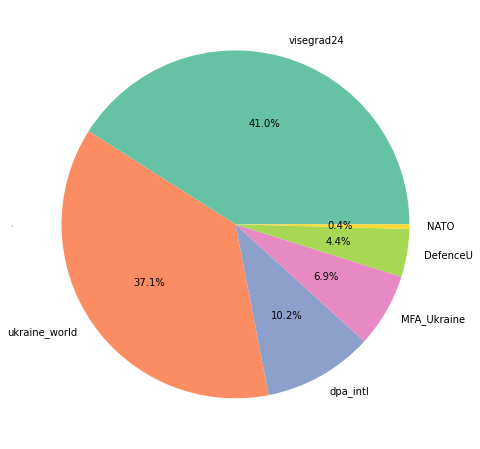

In [8]:
plt.figure(figsize=(8,8))
#plt.title("Tweets per user"), fontsize = 20)

colors = sns.color_palette("Set2")

plt.ylabel('ylabel', fontsize=0)


Tweets_per_user.nlargest(6).plot(kind='pie', 
                                 autopct="%1.1f%%", 
                                 colors = colors)
print("")

### Clean extracted Sources

In [9]:
df['Source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       5328
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                                  4085
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     1234
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                       876
<a href="http://itunes.apple.com/us/app/twitter/id409789998?mt=12" rel="nofollow">Twitter for Mac</a>     195
<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>                               41
<a href="https://twitter.com" rel="nofollow">Twitter for Advertisers</a>                                   15
<a href="https://ads-api.twitter.com" rel="nofollow">Twitter for Advertisers.</a>                          10
<a href="https://tapbots.com/software/tweetbot/mac" rel="nofollow">Tweetbot for Mac</a>                    10
<a href="h

In [10]:
sources = df['Source']

In [11]:
sources.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="https://mobile.twitter.com" rel="nofo...
3    <a href="https://mobile.twitter.com" rel="nofo...
4    <a href="https://mobile.twitter.com" rel="nofo...
Name: Source, dtype: object

In [12]:
print(type(sources[0]))    

<class 'str'>


In [13]:
import re

def clean_html_tags(raw_source):
    cleanr = re.compile('<.*?>')
    clean_text = re.sub(cleanr, '', raw_source)
    return clean_text

In [14]:
print(clean_html_tags(sources[0]))

Twitter for iPhone


In [15]:
clean_source = []
for source in sources:
    source = clean_html_tags(source)
    clean_source.append(source)

In [16]:
df['Source'] = clean_source

In [17]:
df['Source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2       Twitter Web App
3       Twitter Web App
4       Twitter Web App
Name: Source, dtype: object

In [18]:
Tweet_source = df['Source'].value_counts()
Tweet_source

Twitter for iPhone          5328
Twitter Web App             4085
Twitter for Android         1234
TweetDeck                    876
Twitter for Mac              195
Twitter Media Studio          41
Twitter for Advertisers       15
Twitter for Advertisers.      10
Tweetbot for Mac              10
TweetDeck Web App              3
Twitter for iPad               1
Name: Source, dtype: int64

### Plot ^ as a bar graph

In [19]:
import numpy as np

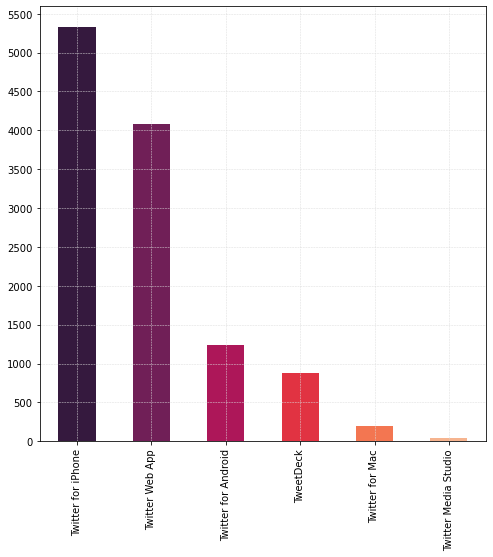

In [20]:
plt.figure(figsize=(8,8))


colors = sns.color_palette("rocket")
Tweet_source.nlargest(6).plot(kind='bar', color = colors)
plt.yticks(np.arange(0, 5600, step=500))
plt.xticks(rotation = 90)

#plt.title("Twitter Source Analysis")
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)

plt.show()

In [21]:
df.head()

,Users,Date,Tweets,Source
0,visegrad24,2022-12-01 22:44:18+00:00,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone
1,visegrad24,2022-12-01 22:24:29+00:00,Ukrainian orphans eating soup and lining up fo...,Twitter for iPhone
2,ukraine_world,2022-12-01 21:30:18+00:00,A regular scene for Ukrainian families...\nSou...,Twitter Web App
3,ukraine_world,2022-12-01 21:24:39+00:00,A short sum up of the Russian war against Ukra...,Twitter Web App
4,ukraine_world,2022-12-01 20:38:10+00:00,Ukraine is a progressive industrial state. Its...,Twitter Web App


### Clean the date to yyyy-mm-dd format only and remove the time stamp

In [22]:
df['Date'].head()

0   2022-12-01 22:44:18+00:00
1   2022-12-01 22:24:29+00:00
2   2022-12-01 21:30:18+00:00
3   2022-12-01 21:24:39+00:00
4   2022-12-01 20:38:10+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [23]:
Dates = df['Date']

In [24]:
Dates[0]

Timestamp('2022-12-01 22:44:18+0000', tz='UTC')

In [25]:
clean_dates = []
for date in Dates:
    date = str(date)
    date = date[:-15]
    clean_dates.append(date)

In [26]:
df['Date'] = clean_dates

In [27]:
#df = df.drop(columns=['Dates'])

In [102]:
tweets_per_day = df['Date'].value_counts()
tweets_per_day.sort_values()

2022-08-13      9
2022-11-13     11
2022-11-12     11
2022-07-02     12
2022-10-08     13
             ... 
2022-02-27    138
2022-03-01    150
2022-02-26    188
2022-02-25    197
2022-02-24    231
Name: Date, Length: 281, dtype: int64

In [29]:
print(type(tweets_per_day))

<class 'pandas.core.series.Series'>


In [30]:
df

,Users,Date,Tweets,Source
0,visegrad24,2022-12-01,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone
1,visegrad24,2022-12-01,Ukrainian orphans eating soup and lining up fo...,Twitter for iPhone
2,ukraine_world,2022-12-01,A regular scene for Ukrainian families...\nSou...,Twitter Web App
3,ukraine_world,2022-12-01,A short sum up of the Russian war against Ukra...,Twitter Web App
4,ukraine_world,2022-12-01,Ukraine is a progressive industrial state. Its...,Twitter Web App
...,...,...,...,...
11793,ukraine_world,2022-02-24,"said Russia intends to ""denazify"" Ukraine",Twitter for Android
11794,ukraine_world,2022-02-24,he addressed Russians with a special video add...,Twitter for Android
11795,visegrad24,2022-02-24,U.S. Secretary of State Blinken believes Russi...,Twitter for iPhone
11796,visegrad24,2022-02-24,Perhaps the most brave and stunning take on Ru...,Twitter for iPhone


### Clean the tweets

In [31]:
#!pip install neattext

In [32]:
import neattext.functions as nfx

In [33]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [34]:
df['Tweets'].head()

0    Soloviev can’t stand the fact that Russia is l...
1    Ukrainian orphans eating soup and lining up fo...
2    A regular scene for Ukrainian families...\nSou...
3    A short sum up of the Russian war against Ukra...
4    Ukraine is a progressive industrial state. Its...
Name: Tweets, dtype: object

In [35]:
df['Tweets'].iloc[0]

'Soloviev can’t stand the fact that Russia is losing to Ukraine, so he tries to convince the audience that it’s Polish, British and American troops that are giving the Russians a beating. https://t.co/JGwhwHGLD5'

### Noise
+ remove mentions 
+ remove hashtags
+ urls
+ emojis 
+ special char

### Extract #tags from the tweets and add column to the df

In [36]:
df['extracted_hashtags'] = df['Tweets'].apply(nfx.extract_hashtags)

In [37]:
df.head()

,Users,Date,Tweets,Source,extracted_hashtags
0,visegrad24,2022-12-01,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone,[]
1,visegrad24,2022-12-01,Ukrainian orphans eating soup and lining up fo...,Twitter for iPhone,[]
2,ukraine_world,2022-12-01,A regular scene for Ukrainian families...\nSou...,Twitter Web App,[]
3,ukraine_world,2022-12-01,A short sum up of the Russian war against Ukra...,Twitter Web App,[]
4,ukraine_world,2022-12-01,Ukraine is a progressive industrial state. Its...,Twitter Web App,[#AgainstRussianLies]


In [38]:
tags = list(filter(None, df['extracted_hashtags']))

In [39]:
tags[:5]

[['#AgainstRussianLies'],
 ['#Ukrainian', "#Russia's"],
 ['#Ukrainians.', '#Ukrainian', '#StandWithUkraine'],
 ['#StandWithUkraine'],
 ["#Russia's", '#Ukraine️?', '#RussiaIsATerroristState', '#RussiaUkraineWar']]

In [40]:
hashtag_list = []
for list in tags:
    for tag in list:
        hashtag_list.append(tag)
print(hashtag_list)

['#AgainstRussianLies', '#Ukrainian', "#Russia's", '#Ukrainians.', '#Ukrainian', '#StandWithUkraine', '#StandWithUkraine', "#Russia's", '#Ukraine️?', '#RussiaIsATerroristState', '#RussiaUkraineWar', '#Ukraine’s', '#Russia,', '#UkraineWillWin', '#Russia', '#RussiaIsATerroristState,', '#RussianUkrainianWar', '#Russia', '#RussiaIsATerroristState', '#Ukraine.', '#Russian', '#Russia’s', '#AgainstRussianLies', '#Russia', "#Ukraine's", "#Russia's", '#Ukraine.', '#russiaisateroriststate', "#Russia's", '#Ukrainians,', '#Russian', '#Ukraine,', '#NATO', '#ForMin', '#StopRussiaNOW', '#Ukraine.', '#Russian', '#Russia’s', '#Ukraine', '#Ukrainian', '#Russian', '#StandWithUkraine️', '#RussiaUkraineWar', '#RussiaIsATerroristState', '#RussiaUkraineWar,', '#Barbados!', '#NorthStream2', '#RussiaUkraineWar', '#StopRussianAggression', '#NATO', '#ForMin', '#StandWithUkraine', '#Ukraine.', '#Russian', '#Russia’s', '#RussiaInvadedUkraine', '#StopRussia', '#Russia', '#RussiaInvadedUkraine', '#RussiaUkraineWar',

In [95]:
hashtag_count = df['extracted_hashtags'].value_counts()
hashtag_count

[]                                           9385
[#StandWithUkraine]                           149
[#Russia’s, #Ukraine., #Russian]              111
[#StopRussia]                                 106
[#BREAKING]                                    63
                                             ... 
[#stopRussia]                                   1
[#MovingForwardTogether]                        1
[#Mykolaiv]                                     1
[#Russian, #Russia, #Ukraine.]                  1
[#NATO, #Ukraine, #StopRussianAggression]       1
Name: extracted_hashtags, Length: 1062, dtype: int64

# HELP

In [41]:
# go through the list and append to another list to get TAGS count

### Clean tweets using NeatText 

In [42]:
# remove hashtags
df['clean_tweets'] = df['Tweets'].apply(nfx.remove_hashtags)

In [43]:
# remove mentions
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_userhandles)

In [44]:
# remove html line space
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_multiple_spaces)

In [45]:
# remove html tags
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_html_tags)

In [46]:
# remove urls
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_urls)

In [47]:
# remove punctuations
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_puncts)

In [48]:
# remove emojis
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_emojis)

In [49]:
# Raw tweet
df['Tweets'].iloc[3]

'A short sum up of the Russian war against Ukraine 👇 https://t.co/cv5a4weuL6'

In [50]:
# After removing noise from the content
df['clean_tweets'].iloc[3]

'A short sum up of the Russian war against Ukraine  '

In [51]:
processed_tweets = df['clean_tweets']

In [52]:
processed_tweets[:4]

0    Soloviev can’t stand the fact that Russia is l...
1    Ukrainian orphans eating soup and lining up fo...
2     A regular scene for Ukrainian families\nSource: 
3    A short sum up of the Russian war against Ukra...
Name: clean_tweets, dtype: object

### Keyword extraction

In [90]:
nfx.remove_stopwords

<function neattext.functions.functions.remove_stopwords(text, lang='en')>

In [53]:
# remove Stopwords
cleaned_tweets_list = processed_tweets.apply(nfx.remove_stopwords).tolist()
cleaned_tweets_list = 

In [54]:
# tokenization
# for sentence in cleaned_tweets_list:
#     for token in sentence.split():


In [55]:
# save the tokens
tokens = [token for sentence in cleaned_tweets_list for token in sentence.split()]

In [56]:
from collections import Counter

In [57]:
# ectract common keywords
def get_keywords(docx, number = 20):
    count_tokens = Counter(docx)
    keywords = count_tokens.most_common(number)
    result = dict(keywords)
    return result

In [58]:
keywords = get_keywords(tokens)

### Plot ^ for keywords

In [59]:
new_df = pd.DataFrame(keywords.items(), columns=['Words', 'Counts'])

In [60]:
new_df.head()

,Words,Counts
0,Ukrainian,6053
1,Ukraine,3893
2,Russia,3849
3,Russian,3732
4,war,3078


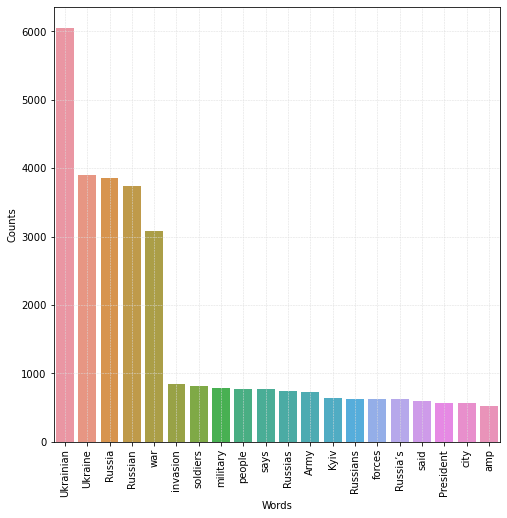

In [61]:
plt.figure(figsize=(8,8))

sns.barplot(x = 'Words', y = 'Counts', data = new_df)

#plt.title("Keywords Analysis")
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)

plt.xticks(rotation = 90)
plt.show()

### Sentiment Analysis

In [62]:
#!pip install textblob

In [63]:
from textblob import TextBlob

In [64]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [65]:
df.head(1)

,Users,Date,Tweets,Source,extracted_hashtags,clean_tweets
0,visegrad24,2022-12-01,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone,[],Soloviev can’t stand the fact that Russia is l...


In [66]:
example = df['clean_tweets'].iloc[7]
example

'Not only is bombing Ukrainian infrastructure militarily justifiable said Russias foreign minister it is helping save lives he claimed '

In [67]:
get_sentiment(example)

{'polarity': -0.075,
 'subjectivity': 0.4083333333333334,
 'sentiment': 'Negative'}

In [68]:
example_1 = df['clean_tweets'].iloc[1]
example_1

'Ukrainian orphans eating soup and lining up for dessert So many Ukrainian kids have lost their parents due to Russia’s invasion Many of these orphanages have been given aid from the West It’s great to see so many people extending their hands to help these kids out '

In [69]:
get_sentiment(example_1)

{'polarity': 0.43499999999999994,
 'subjectivity': 0.525,
 'sentiment': 'Positive'}

In [70]:
example_2 = df['clean_tweets'].iloc[20]
example_2

'2⃣8⃣1⃣ days of fullscale Russia’s war on Information on invasion\nLosses of armed forces in Ukraine December 1 '

In [71]:
get_sentiment(example_2)

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [72]:
df['dir_sentiment'] = df['clean_tweets'].apply(get_sentiment)

In [73]:
# df = df.drop(columns=['sentiment'])

In [74]:
df.head(1)

,Users,Date,Tweets,Source,extracted_hashtags,clean_tweets,dir_sentiment
0,visegrad24,2022-12-01,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone,[],Soloviev can’t stand the fact that Russia is l...,"{'polarity': -0.03333333333333333, 'subjectivi..."


In [75]:
df['dir_sentiment'].iloc[0]

{'polarity': -0.03333333333333333,
 'subjectivity': 0.13333333333333333,
 'sentiment': 'Negative'}

In [76]:
pd.json_normalize(df['dir_sentiment'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.033333,0.133333,Negative


In [77]:
df = df.join(pd.json_normalize(df['dir_sentiment']))

In [87]:
df.head()

,Users,Date,Tweets,Source,extracted_hashtags,clean_tweets,dir_sentiment,polarity,subjectivity,sentiment
0,visegrad24,2022-12-01,Soloviev can’t stand the fact that Russia is l...,Twitter for iPhone,[],Soloviev can’t stand the fact that Russia is l...,"{'polarity': -0.03333333333333333, 'subjectivi...",-0.033333,0.133333,Negative
1,visegrad24,2022-12-01,Ukrainian orphans eating soup and lining up fo...,Twitter for iPhone,[],Ukrainian orphans eating soup and lining up fo...,"{'polarity': 0.43499999999999994, 'subjectivit...",0.435000,0.525000,Positive
2,ukraine_world,2022-12-01,A regular scene for Ukrainian families...\nSou...,Twitter Web App,[],A regular scene for Ukrainian families\nSource:,"{'polarity': 0.0, 'subjectivity': 0.0769230769...",0.000000,0.076923,Neutral
3,ukraine_world,2022-12-01,A short sum up of the Russian war against Ukra...,Twitter Web App,[],A short sum up of the Russian war against Ukra...,"{'polarity': 0.0, 'subjectivity': 0.15, 'senti...",0.000000,0.150000,Neutral
4,ukraine_world,2022-12-01,Ukraine is a progressive industrial state. Its...,Twitter Web App,[#AgainstRussianLies],Ukraine is a progressive industrial state Its ...,"{'polarity': 0.0, 'subjectivity': 0.3083333333...",0.000000,0.308333,Neutral


In [79]:
df['sentiment'].value_counts()

Positive    4926
Neutral     3782
Negative    3090
Name: sentiment, dtype: int64

In [85]:
df['clean_tweets'].iloc[8]

'We are now in December amp Ukrainians will experience a very different Christmas season compared to the rest of us Let’s help them get through winter “Carol of the Bells was written by the Ukrainian composer Mykola Leontovych in 1914 and become popular in the US in the 1920s '

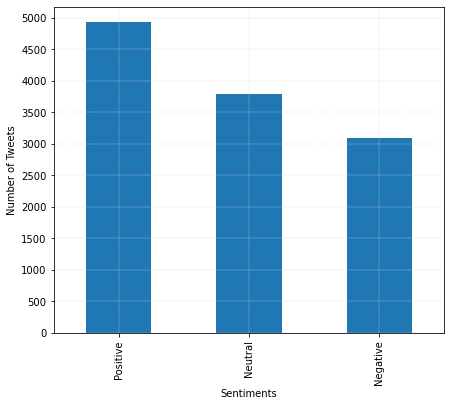

In [118]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(6)

df['sentiment'].value_counts().plot(kind='bar')

plt.yticks(np.arange(0, 5005, step= 500))

plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')

plt.grid(color='gainsboro', linestyle='--', linewidth=0.4)
plt.show()

### Scatter plot 

Text(0, 0.5, 'Subjectivity')

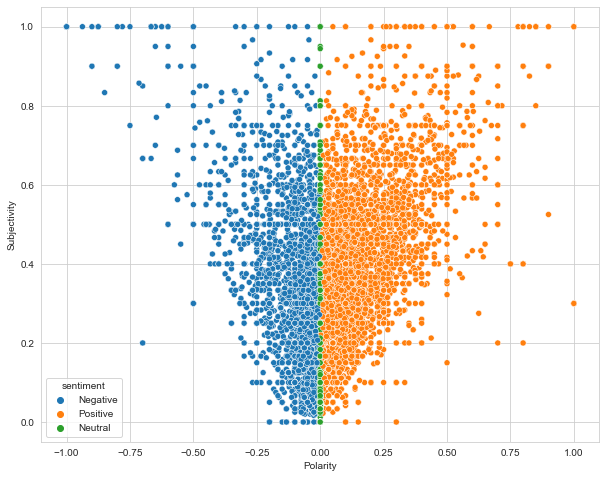

In [135]:
plt.figure(figsize = (10,8))

sns.set_style("whitegrid")
sns.scatterplot(data = df, x = "polarity", y = "subjectivity", hue = "sentiment") 

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

